# Chapter Goals
- Basic simple ideas of data mining algorithms

# Lab Goals
- Familiarity with how algorithms generate some outputs given patterns in inputs

# General Guidlines
- Visualization
- Modifiable code snippets

---

In [ ]:
# Loading a dataset
# dataset names: "airline", "breast-cancer", "contact-lenses", "cpu", "cpu.with.vendor", "credit-g", "diabetes", "glass", "hypothyroid", "ionosphere", "iris.2D", "iris", "labor", "segment-challenge", "segment-test", "soybean", "supermarket", "unbalanced", "vote", "weather.nominal", "weather.numeric"
# df = pd.read_csv("data/weather.numeric.csv")
# instances = loader.load_file("data/weather.numeric.arff")

# Modules & Datasets Setup

In [ ]:
# @title
!apt-get install default-jdk
!apt install libgraphviz-dev

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  default-jdk-headless default-jre default-jre-headless fonts-dejavu-core fonts-dejavu-extra
  libatk-wrapper-java libatk-wrapper-java-jni libfontenc1 libice-dev libsm-dev libxkbfile1
  libxt-dev libxtst6 libxxf86dga1 openjdk-11-jdk openjdk-11-jre x11-utils
Suggested packages:
  libice-doc libsm-doc libxt-doc openjdk-11-demo openjdk-11-source visualvm mesa-utils
The following NEW packages will be installed:
  default-jdk default-jdk-headless default-jre default-jre-headless fonts-dejavu-core
  fonts-dejavu-extra libatk-wrapper-java libatk-wrapper-java-jni libfontenc1 libice-dev libsm-dev
  libxkbfile1 libxt-dev libxtst6 libxxf86dga1 openjdk-11-jdk openjdk-11-jre x11-utils
0 upgraded, 18 newly installed, 0 to remove and 18 not upgraded.
Need to get 5,518 kB of archives.
After this operation, 15.8 MB of additional disk space will be used.
G

In [ ]:
# @title
!pip install pygraphviz
!pip install python-javabridge
!pip install python-weka-wrapper3
!pip install sklearn-weka-plugin

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 120.8/120.8 kB 1.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pygraphviz: filename=pygraphviz-1.11-cp310-cp310-linux_x86_64.whl size=175926 sha256=f8553fee25a0d4b3091f5149a0d5f17a43564c37a5a1b2d603a6ddfa263aa20f
  Stored in directory: /root/.cache/pip/wheels/5b/ee/36/f47a0d35664fbe1a2b5a433ae33c6ad636b00bb231f68a9aaa
Successfully built pygraphviz
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 9.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for python-javabridge: filename=python_javabridge-4.0.3-cp310-cp310-linux_x86_64.whl size=1743151 sha256=2a1bf7c136bcf50e71173608bb78d9df5bba8ab21602176a8276b769b58c97c5
  Stored in directory: /root/.cache/pip/wheels/35/58/be/c5d71b71a9dd6585f897fa5b2d021e03962eb30d6b20797396
Successfully built python-javabridge
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.9/15.9 MB 17.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done

In [ ]:
# @title
#Restart runtime after installing the dependencies

In [ ]:
# @title
import os
import glob
import numpy as np
import pandas as pd
import weka.core.jvm as jvm
from weka.core import converters
import matplotlib.pyplot as plt

In [ ]:
# @title
data_dir = 'data'

In [ ]:
# @title
#!rm -r weka
#!rm -r data

In [ ]:
# @title
#jvm.stop()
jvm.start(packages=True)

DEBUG:weka.core.jvm:Adding bundled jars
DEBUG:weka.core.jvm:Classpath=['/usr/local/lib/python3.10/dist-packages/javabridge/jars/rhino-1.7R4.jar', '/usr/local/lib/python3.10/dist-packages/javabridge/jars/runnablequeue.jar', '/usr/local/lib/python3.10/dist-packages/javabridge/jars/cpython.jar', '/usr/local/lib/python3.10/dist-packages/weka/lib/mtj.jar', '/usr/local/lib/python3.10/dist-packages/weka/lib/weka.jar', '/usr/local/lib/python3.10/dist-packages/weka/lib/arpack_combined.jar', '/usr/local/lib/python3.10/dist-packages/weka/lib/python-weka-wrapper.jar', '/usr/local/lib/python3.10/dist-packages/weka/lib/core.jar']
DEBUG:weka.core.jvm:MaxHeapSize=default
DEBUG:weka.core.jvm:Package support enabled


In [ ]:
# @title
# Preparing Datasets
if not os.path.exists(data_dir):
    !mkdir $data_dir
    for file in ['airline.arff', 'breast-cancer.arff', 'contact-lenses.arff', 'cpu.arff', 'cpu.with.vendor.arff', 'credit-g.arff', 'diabetes.arff', 'glass.arff', 'hypothyroid.arff', 'ionosphere.arff', 'iris.2D.arff', 'iris.arff', 'labor.arff', 'segment-challenge.arff', 'segment-test.arff', 'soybean.arff', 'supermarket.arff', 'unbalanced.arff', 'vote.arff', 'weather.nominal.arff', 'weather.numeric.arff',]:
        url = 'https://git.cms.waikato.ac.nz/weka/weka/-/raw/main/trunk/wekadocs/data/' + file
        !wget -P $data_dir $url
    loader = converters.Loader(classname="weka.core.converters.ArffLoader")
    saver = converters.Saver(classname="weka.core.converters.CSVSaver")
    for file in glob.glob(os.path.join(data_dir, '*.arff')):
        dataset = loader.load_file(file)
        filename, file_extension = os.path.splitext(file)
        saver.save_file(dataset, filename + '.csv')
    !wget -P $data_dir https://raw.githubusercontent.com/Rytuo/ITMO-CT/master/Others/AdvancedML/data/OpenML/data/1438.arff
    !rm -r weka

--2023-10-24 14:54:26--  https://git.cms.waikato.ac.nz/weka/weka/-/raw/main/trunk/wekadocs/data/airline.arff
Resolving git.cms.waikato.ac.nz (git.cms.waikato.ac.nz)... 130.217.218.43
Connecting to git.cms.waikato.ac.nz (git.cms.waikato.ac.nz)|130.217.218.43|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2357 (2.3K) [text/plain]
Saving to: ‘data/airline.arff’

airline.arff        100%[===================>]   2.30K  --.-KB/s    in 0s      

2023-10-24 14:54:27 (1.09 GB/s) - ‘data/airline.arff’ saved [2357/2357]

--2023-10-24 14:54:27--  https://git.cms.waikato.ac.nz/weka/weka/-/raw/main/trunk/wekadocs/data/breast-cancer.arff
Resolving git.cms.waikato.ac.nz (git.cms.waikato.ac.nz)... 130.217.218.43
Connecting to git.cms.waikato.ac.nz (git.cms.waikato.ac.nz)|130.217.218.43|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29418 (29K) [text/plain]
Saving to: ‘data/breast-cancer.arff’

breast-cancer.arff  100%[===================>]  28.73K  

In [ ]:
# @title
import weka.core.packages as packages
packages.install_package("simpleEducationalLearningSchemes")

from weka.core.converters import Loader
loader = Loader(classname="weka.core.converters.ArffLoader")

# 4.1 Inferring Rudimentary Rules

Sources
- [1R by Weka](https://weka.sourceforge.io/doc.dev/weka/classifiers/rules/OneR.html)

In [ ]:
# weather numeric dataset
instances = loader.load_file("data/weather.numeric.arff")
instances

@relation weather

@attribute outlook {sunny,overcast,rainy}
@attribute temperature numeric
@attribute humidity numeric
@attribute windy {TRUE,FALSE}
@attribute play {yes,no}

@data
sunny,85,85,FALSE,no
sunny,80,90,TRUE,no
overcast,83,86,FALSE,yes
rainy,70,96,FALSE,yes
rainy,68,80,FALSE,yes
rainy,65,70,TRUE,no
overcast,64,65,TRUE,yes
sunny,72,95,FALSE,no
sunny,69,70,FALSE,yes
rainy,75,80,FALSE,yes
sunny,75,70,TRUE,yes
overcast,72,90,TRUE,yes
overcast,81,75,FALSE,yes
rainy,71,91,TRUE,no

In [ ]:
# classes indices
# yes, no = 0, 1

In [ ]:
# set class attribute to the last attribute, i.e attribute "play"
instances.class_index = instances.num_attributes - 1

# from doc but does not work!
# instances.setClassIndex(instances.numAttributes() - 1);
# use help(instances)

In [ ]:
# train model
from weka.classifiers import Classifier
cls = Classifier(classname="weka.classifiers.rules.OneR")
cls.build_classifier(instances)

In [ ]:
# model inspection
cls.description

<bound method OptionHandler.description of outlook:
	sunny	-> no
	overcast	-> yes
	rainy	-> yes
(10/14 instances correct)
>

In [ ]:
# instance (row)
instances.get_instance(0)

sunny,85,85,FALSE,no

In [ ]:
# prediction on instance
cls.classify_instance( instances.get_instance(0) )

# no

1.0

# 4.2 Simple Probabilistic Model

Sources
- [Naive Bayes by Weka](https://weka.sourceforge.io/doc.dev/weka/classifiers/bayes/NaiveBayes.html)
- [Naive Bayes by Scikit-Learn](https://scikit-learn.org/stable/modules/naive_bayes.html) (different implementation)

In [ ]:
# weather numeric dataset
instances = loader.load_file("data/weather.nominal.arff")
instances

@relation weather.symbolic

@attribute outlook {sunny,overcast,rainy}
@attribute temperature {hot,mild,cool}
@attribute humidity {high,normal}
@attribute windy {TRUE,FALSE}
@attribute play {yes,no}

@data
sunny,hot,high,FALSE,no
sunny,hot,high,TRUE,no
overcast,hot,high,FALSE,yes
rainy,mild,high,FALSE,yes
rainy,cool,normal,FALSE,yes
rainy,cool,normal,TRUE,no
overcast,cool,normal,TRUE,yes
sunny,mild,high,FALSE,no
sunny,cool,normal,FALSE,yes
rainy,mild,normal,FALSE,yes
sunny,mild,normal,TRUE,yes
overcast,mild,high,TRUE,yes
overcast,hot,normal,FALSE,yes
rainy,mild,high,TRUE,no

In [ ]:
# classes indices
# yes, no = 0, 1

In [ ]:
# set class attribute to the last attribute, i.e attribute "play"
instances.class_index = instances.num_attributes - 1

In [ ]:
# train model
from weka.classifiers import Classifier
cls = Classifier(classname="weka.classifiers.bayes.NaiveBayes")
cls.build_classifier(instances)

In [ ]:
# model inspection
cls.description

<bound method OptionHandler.description of Naive Bayes Classifier

                Class
Attribute         yes     no
               (0.63) (0.38)
outlook
  sunny            3.0    4.0
  overcast         5.0    1.0
  rainy            4.0    3.0
  [total]         12.0    8.0

temperature
  hot              3.0    3.0
  mild             5.0    3.0
  cool             4.0    2.0
  [total]         12.0    8.0

humidity
  high             4.0    5.0
  normal           7.0    2.0
  [total]         11.0    7.0

windy
  TRUE             4.0    4.0
  FALSE            7.0    3.0
  [total]         11.0    7.0

>

In [ ]:
# instance (row)
instances.get_instance(0)

sunny,hot,high,FALSE,no

In [ ]:
# prediction on instance
cls.classify_instance( instances.get_instance(0) )

# no

1.0

In [ ]:
# distribution of classes on the instance
cls.distribution_for_instance( instances.get_instance(0) )

# prob[class = 0] = 0 and prob[class = 1] = 1
# recall 0 = yes and 1 = no

array([0.2957534, 0.7042466])

# 4.3 Divide & Conquer: Decision Trees

Sources
- [ID3 by Weka](https://weka.sourceforge.io/doc.stable/weka/classifiers/trees/Id3.html)
- [Decision Tree by Scikit-Learn](https://scikit-learn.org/stable/modules/tree.html) (not ID3)

In [ ]:
# weather nominal dataset
instances = loader.load_file("data/weather.nominal.arff")
instances

@relation weather.symbolic

@attribute outlook {sunny,overcast,rainy}
@attribute temperature {hot,mild,cool}
@attribute humidity {high,normal}
@attribute windy {TRUE,FALSE}
@attribute play {yes,no}

@data
sunny,hot,high,FALSE,no
sunny,hot,high,TRUE,no
overcast,hot,high,FALSE,yes
rainy,mild,high,FALSE,yes
rainy,cool,normal,FALSE,yes
rainy,cool,normal,TRUE,no
overcast,cool,normal,TRUE,yes
sunny,mild,high,FALSE,no
sunny,cool,normal,FALSE,yes
rainy,mild,normal,FALSE,yes
sunny,mild,normal,TRUE,yes
overcast,mild,high,TRUE,yes
overcast,hot,normal,FALSE,yes
rainy,mild,high,TRUE,no

In [ ]:
# classes to indices
# yes, no = 0, 1

In [ ]:
# set class attribute to the last attribute, i.e attribute "play"
instances.class_index = instances.num_attributes - 1

In [ ]:
# train model
from weka.classifiers import Classifier
cls = Classifier(classname="weka.classifiers.trees.Id3")
cls.build_classifier(instances)

In [ ]:
# model inspection
cls.description

<bound method OptionHandler.description of Id3


outlook = sunny
|  humidity = high: no
|  humidity = normal: yes
outlook = overcast: yes
outlook = rainy
|  windy = TRUE: no
|  windy = FALSE: yes>

In [ ]:
# instance (row)
instances.get_instance(0)

sunny,hot,high,FALSE,no

In [ ]:
# prediction on instance
cls.classify_instance( instances.get_instance(0) )

# no

1.0

# 4.4 Covering Algorithms: Constructing Rules

Sources
- [PRISM by Weka](https://weka.sourceforge.io/doc.stable/weka/classifiers/rules/Prism.html)

In [ ]:
# weather nominal dataset
instances = loader.load_file("data/contact-lenses.arff")
instances

@relation contact-lenses

@attribute age {young,pre-presbyopic,presbyopic}
@attribute spectacle-prescrip {myope,hypermetrope}
@attribute astigmatism {no,yes}
@attribute tear-prod-rate {reduced,normal}
@attribute contact-lenses {soft,hard,none}

@data
young,myope,no,reduced,none
young,myope,no,normal,soft
young,myope,yes,reduced,none
young,myope,yes,normal,hard
young,hypermetrope,no,reduced,none
young,hypermetrope,no,normal,soft
young,hypermetrope,yes,reduced,none
young,hypermetrope,yes,normal,hard
pre-presbyopic,myope,no,reduced,none
pre-presbyopic,myope,no,normal,soft
pre-presbyopic,myope,yes,reduced,none
pre-presbyopic,myope,yes,normal,hard
pre-presbyopic,hypermetrope,no,reduced,none
pre-presbyopic,hypermetrope,no,normal,soft
pre-presbyopic,hypermetrope,yes,reduced,none
pre-presbyopic,hypermetrope,yes,normal,none
presbyopic,myope,no,reduced,none
presbyopic,myope,no,normal,none
presbyopic,myope,yes,reduced,none
presbyopic,myope,yes,normal,hard
presbyopic,hypermetrope,no,reduced,none
p

In [ ]:
# classes to indices
# soft, hard, none = 0 ,1, 2

In [ ]:
# set class attribute to the last attribute, i.e attribute "contact-lenses"
instances.class_index = instances.num_attributes - 1

In [ ]:
# train model
from weka.classifiers import Classifier
cls = Classifier(classname="weka.classifiers.rules.Prism")
cls.build_classifier(instances)

In [ ]:
# model inspection
cls.description

<bound method OptionHandler.description of Prism rules
----------
If astigmatism = no
   and tear-prod-rate = normal
   and spectacle-prescrip = hypermetrope then soft
If astigmatism = no
   and tear-prod-rate = normal
   and age = young then soft
If age = pre-presbyopic
   and astigmatism = no
   and tear-prod-rate = normal then soft
If astigmatism = yes
   and tear-prod-rate = normal
   and spectacle-prescrip = myope then hard
If age = young
   and astigmatism = yes
   and tear-prod-rate = normal then hard
If tear-prod-rate = reduced then none
If age = presbyopic
   and tear-prod-rate = normal
   and spectacle-prescrip = myope
   and astigmatism = no then none
If spectacle-prescrip = hypermetrope
   and astigmatism = yes
   and age = pre-presbyopic then none
If age = presbyopic
   and spectacle-prescrip = hypermetrope
   and astigmatism = yes then none
>

In [ ]:
# instance (row)
instances.get_instance(0)

# age=young, spectacle-prescrip=myope, astigmatism=no, tear-prod-rate=reduced, contact-lenses=:none
# by rule: If tear-prod-rate = reduced then none

young,myope,no,reduced,none

In [ ]:
# prediction on instance
cls.classify_instance( instances.get_instance(0) )

# none

2.0

# 4.5 Mining Association Rules

Sources
- [Apriori by Weka](https://weka.sourceforge.io/doc.dev/weka/associations/Apriori.html)

In [ ]:
# weather nominal dataset
instances = loader.load_file("data/weather.nominal.arff")
instances

@relation weather.symbolic

@attribute outlook {sunny,overcast,rainy}
@attribute temperature {hot,mild,cool}
@attribute humidity {high,normal}
@attribute windy {TRUE,FALSE}
@attribute play {yes,no}

@data
sunny,hot,high,FALSE,no
sunny,hot,high,TRUE,no
overcast,hot,high,FALSE,yes
rainy,mild,high,FALSE,yes
rainy,cool,normal,FALSE,yes
rainy,cool,normal,TRUE,no
overcast,cool,normal,TRUE,yes
sunny,mild,high,FALSE,no
sunny,cool,normal,FALSE,yes
rainy,mild,normal,FALSE,yes
sunny,mild,normal,TRUE,yes
overcast,mild,high,TRUE,yes
overcast,hot,normal,FALSE,yes
rainy,mild,high,TRUE,no

In [ ]:
# classes to indices
# yes, no = 0, 1

In [ ]:
# set class attribute to the last attribute, i.e attribute "play"
instances.class_index = instances.num_attributes - 1

In [ ]:
# train model
from weka.associations import Associator
associator = Associator(classname="weka.associations.Apriori")
associator.build_associations(instances)

In [ ]:
# model inspection
associator.description

<bound method OptionHandler.description of 
Apriori

Minimum support: 0.15 (2 instances)
Minimum metric <confidence>: 0.9
Number of cycles performed: 17

Generated sets of large itemsets:

Size of set of large itemsets L(1): 12

Size of set of large itemsets L(2): 47

Size of set of large itemsets L(3): 39

Size of set of large itemsets L(4): 6

Best rules found:

 1. outlook=overcast 4 ==> play=yes 4    <conf:(1)> lift:(1.56) lev:(0.1) [1] conv:(1.43)
 2. temperature=cool 4 ==> humidity=normal 4    <conf:(1)> lift:(2) lev:(0.14) [2] conv:(2)
 3. humidity=normal windy=FALSE 4 ==> play=yes 4    <conf:(1)> lift:(1.56) lev:(0.1) [1] conv:(1.43)
 4. outlook=sunny play=no 3 ==> humidity=high 3    <conf:(1)> lift:(2) lev:(0.11) [1] conv:(1.5)
 5. outlook=sunny humidity=high 3 ==> play=no 3    <conf:(1)> lift:(2.8) lev:(0.14) [1] conv:(1.93)
 6. outlook=rainy play=yes 3 ==> windy=FALSE 3    <conf:(1)> lift:(1.75) lev:(0.09) [1] conv:(1.29)
 7. outlook=rainy windy=FALSE 3 ==> play=yes 3    <co

In [ ]:
# instance (row)
instances.get_instance(0)

# age=young, spectacle-prescrip=myope, astigmatism=no, tear-prod-rate=reduced, contact-lenses=:none
# by rule: If tear-prod-rate = reduced then none

sunny,hot,high,FALSE,no

In [ ]:
# From `help(associator)` it seems we cannot infer based on a given instance

# 4.6 Linear Models

## Linear Regression

In [ ]:
df = pd.read_csv("data/cpu.csv")
df

,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,class
0,125,256,6000,256,16,128,198
1,29,8000,32000,32,8,32,269
2,29,8000,32000,32,8,32,220
3,29,8000,32000,32,8,32,172
4,29,8000,16000,32,8,16,132
...,...,...,...,...,...,...,...
204,124,1000,8000,0,1,8,42
205,98,1000,8000,32,2,8,46
206,125,2000,8000,0,2,14,52
207,480,512,8000,32,0,0,67


In [ ]:
from sklearn import linear_model

reg = linear_model.LinearRegression()
reg.fit( df[["CACH"]], y = df["class"] )

reg.coef_, reg.intercept_

(array([2.62309769]), 39.50488702952755)

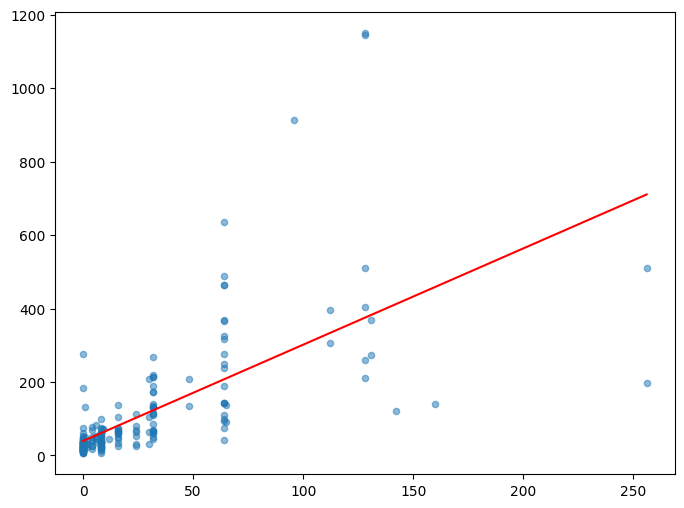

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot( df[["CACH"]], reg.predict(df[["CACH"]]), c='r' )
plt.scatter( df[["CACH"]], y=df["class"], s=20, alpha=0.5 )

## Logistic Regression

In [ ]:
# Dummy Dataframe
#####

df = pd.DataFrame([
    [-2,0],
    [-1,0],
    [0,1],
    [1,1],
    [2,1],

],
  columns = ["X", "class"]
)
df

,X,class
0,-2,0
1,-1,0
2,0,1
3,1,1
4,2,1


In [ ]:
# Fit the model

from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()
clf.fit(df[["X"]].to_numpy(), df["class"].to_numpy())

LogisticRegression()

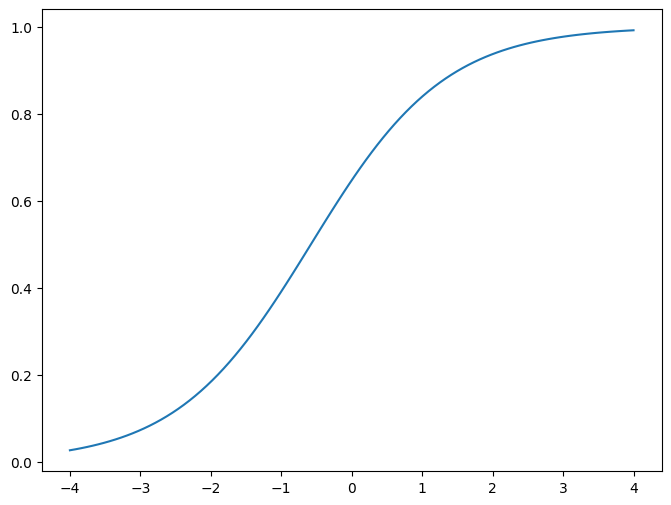

In [ ]:
# Visualize the logit function

# Define the logistic function
def logistic_function(x, coef, intercept):
    # dot product + intercept
    logit = np.dot(coef, x) + intercept
    return 1 / (1 + np.exp(-logit))

# Define the range of x values for the plot
X_tem = np.linspace(-4, 4, 100)

Y_tem = logistic_function(X_tem, clf.coef_[0][0], clf.intercept_[0])

# Create a plot
plt.figure(figsize=(8, 6))
plt.plot(X_tem, Y_tem)

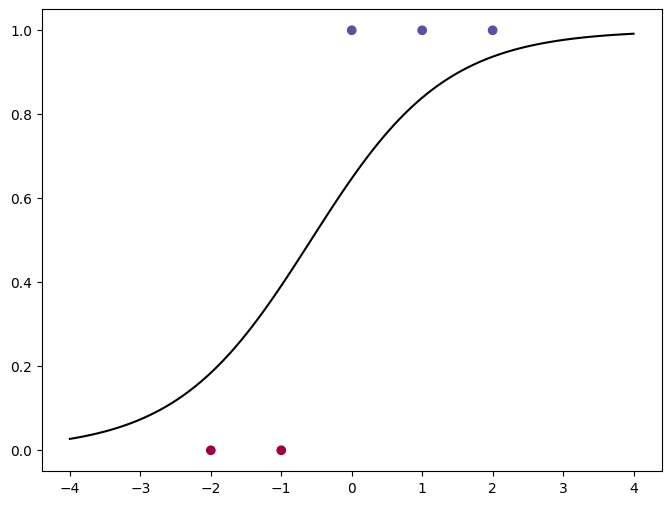

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter( df["X"], y = df["class"], c=df["class"], cmap=plt.cm.Spectral )
plt.plot(X_tem, Y_tem, c="black")

In [ ]:
# predict an unseen instance
clf.predict([ [-4] ])

array([0])

In [ ]:
# probabilities of classes
clf.predict_proba([
    [0.5]
])

array([[0.24404677, 0.75595323]])

In [ ]:
clf.predict_proba([
    [-1]
])

array([[0.60821662, 0.39178338]])

# 4.7 Instance-Based Learning (in development)

In [ ]:
# kd-tree
# https://weka.sourceforge.io/doc.dev/weka/core/neighboursearch/KDTree.html

# 4.8 Clustering

Text(0, 0.5, 'Y')

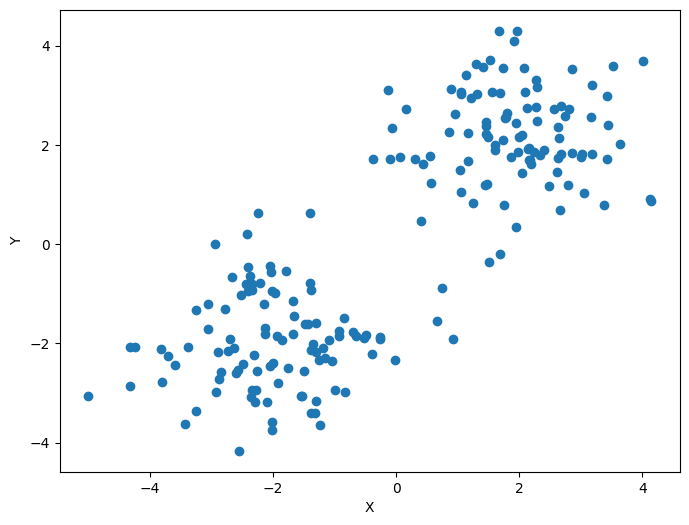

In [ ]:
# Dummy Dataframe


# Set a random seed for reproducibility
#np.random.seed(0)

# Number of data points for each class
numSamples = 100

# dataset of class 0
df_tem0 = pd.DataFrame({
    "X": np.random.randn(numSamples) + 2, "Y": np.random.randn(numSamples) + 2
  })

# dataset of class 1
df_tem1 = pd.DataFrame({
    "X": np.random.randn(numSamples) - 2, "Y": np.random.randn(numSamples) - 2
  })

# dataframe, concatenates both
df = pd.concat([df_tem0, df_tem1])

# Plot the generated data
plt.figure(figsize=(8, 6))
plt.scatter( df["X"], y = df["Y"] )
plt.xlabel("X"); plt.ylabel("Y")
# plt.show()

In [ ]:
# Fit K-Means

from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=0, n_init="auto").fit(df[["X","Y"]])

#kmeans.predict([[0, 0], [12, 3]])
#kmeans.cluster_centers_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int32)

Text(0, 0.5, 'Y')

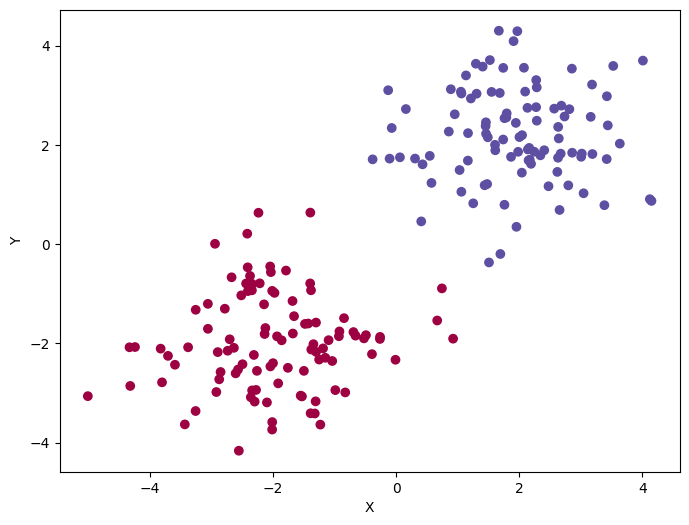

In [ ]:
# Visualize clusters
plt.figure(figsize=(8, 6))
plt.scatter( df["X"], y = df["Y"], c=kmeans.labels_, cmap=plt.cm.Spectral )
plt.xlabel("X"); plt.ylabel("Y")

# Lab Tasks

- Construct a dummy dataframe using randomization as we illustrated, or alternatively by the following snippet:
```
pd.DataFrame([
    [1,1],
    [1,2],
    [4,4],
    [5,6]
  ],
  columns=["X","Y"]
)
```
- Select an algorithm.
- Experiment with different inputs, comparing and contrasting outputs and visualizations.
- Decide on an output pattern, then construct a dataframe conforming to it.

P.S. We delegate to students to express what they wish to learn the most, and accordingly solve the lab task.